In [1]:
import numpy as np 
import pandas as pd
import keras 
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [2]:
df=pd.read_csv("train.csv")
base_path="./images/"

In [3]:
df

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474
...,...,...,...
4132909,fc0f007893b11ba7,https://upload.wikimedia.org/wikipedia/commons...,172138
4132910,39aad18585867916,https://upload.wikimedia.org/wikipedia/commons...,162860
4132911,fd0725460e4ebbec,https://upload.wikimedia.org/wikipedia/commons...,191243
4132912,73691ae29e24ba19,https://upload.wikimedia.org/wikipedia/commons...,145760


In [4]:
df=df.loc[df["id"].str.startswith('00',na=False),:]
num_classes=len(df["landmark_id"].unique())
num_data=len(df)
df

,id,url,landmark_id
108,0036d78c05c194d9,https://upload.wikimedia.org/wikipedia/commons...,50089
172,00c08b162f34f53f,https://upload.wikimedia.org/wikipedia/commons...,163404
710,00e5d77c905d94a6,https://upload.wikimedia.org/wikipedia/commons...,26066
1256,00c8dba0df4d112a,https://upload.wikimedia.org/wikipedia/commons...,35744
1262,001cd787f1e9a803,https://upload.wikimedia.org/wikipedia/commons...,61937
...,...,...,...
4131341,0069f71dc6c5dac0,http://upload.wikimedia.org/wikipedia/commons/...,51272
4131349,00f1aecb6c90b551,https://upload.wikimedia.org/wikipedia/commons...,63972
4131698,00de9755a042c271,https://upload.wikimedia.org/wikipedia/commons...,73064
4132109,009cb0761e9b3ce1,https://upload.wikimedia.org/wikipedia/commons...,68657


In [5]:
num_classes

13589

In [6]:
num_data

16157

In [7]:
data=pd.DataFrame(df["landmark_id"].value_counts())
data

,count
landmark_id,
138982,47
62798,18
83144,14
171772,13
176528,12
...,...
54986,1
182355,1
25204,1


In [8]:
data.reset_index(inplace=True)
data.colums=['landmark_id','count']
data

C:\Users\91789\AppData\Local\Temp\ipykernel_21872\2740736018.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.colums=['landmark_id','count']


,landmark_id,count
0,138982,47
1,62798,18
2,83144,14
3,171772,13
4,176528,12
...,...,...
13584,54986,1
13585,182355,1
13586,25204,1
13587,100559,1


In [9]:
data["landmark_id"].describe()

count     13589.000000
mean     101833.646700
std       58898.626573
min           0.000000
25%       50255.000000
50%      101438.000000
75%      153527.000000
max      203073.000000
Name: landmark_id, dtype: float64

(array([0.0000e+00, 0.0000e+00, 1.1789e+04, 0.0000e+00, 1.3960e+03,
        0.0000e+00, 2.5400e+02, 0.0000e+00, 7.6000e+01, 0.0000e+00,
        3.4000e+01, 0.0000e+00, 2.0000e+01, 0.0000e+00, 9.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

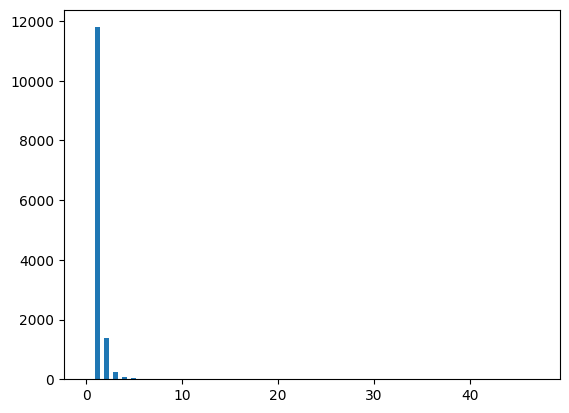

In [10]:
plt.hist(data['count'],100,range=(0,47),label="test")

In [11]:
data['count'].between(0,5).sum()

13549

In [12]:
data['count'].between(5,10).sum()

69

In [13]:
df['landmark_id'].unique()

array([ 50089, 163404,  26066, ..., 103418, 200638,  63972], dtype=int64)

In [8]:
from sklearn.preprocessing import LabelEncoder
lencoder =LabelEncoder()
lencoder.fit(df["landmark_id"])

LabelEncoder()

In [9]:
def encodel(label):
    return lencoder.transform(label)

In [10]:
def decoderl(label):
    return lencoder.inverse_transfrom(label)

array([[[0.11372549, 0.37254902, 0.34509804],
        [0.10588235, 0.23137255, 0.21960784],
        [0.17647059, 0.26666667, 0.23921569],
        ...,
        [0.01568627, 0.02352941, 0.03529412],
        [0.01176471, 0.04705882, 0.04313725],
        [0.0745098 , 0.21960784, 0.17647059]],

       [[0.32941176, 0.56078431, 0.56470588],
        [0.16470588, 0.29019608, 0.27058824],
        [0.15686275, 0.25098039, 0.22352941],
        ...,
        [0.04705882, 0.10588235, 0.09411765],
        [0.0745098 , 0.19607843, 0.15294118],
        [0.11372549, 0.41960784, 0.32156863]],

       [[0.17254902, 0.38823529, 0.42745098],
        [0.07843137, 0.22352941, 0.23137255],
        [0.0745098 , 0.2       , 0.18823529],
        ...,
        [0.0627451 , 0.2       , 0.16470588],
        [0.03529412, 0.23137255, 0.14901961],
        [0.11764706, 0.50196078, 0.37647059]],

       ...,

       [[0.19215686, 0.28235294, 0.16078431],
        [0.19607843, 0.27843137, 0.16470588],
        [0.21960784, 0

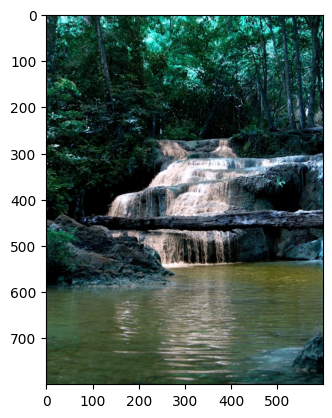

In [48]:
fname,x,label=df.iloc[100,:]
fname=fname +'.jpg'
f1=fname[0]
f2=fname[1]
f3=fname[2]
full_path=os.path.join(f1,f2,f3,fname)
im=cv2.imread(os.path.join(base_path,full_path))
plt.imshow(im)
im=cv2.resize(im,(224,224),interpolation=cv2.INTER_AREA)/255.0
im

In [52]:
def get_image_num(num,df):
    fname,x,label=df.iloc[num,:]
    fname=fname +'.jpg'
    f1=fname[0]
    f2=fname[1]
    f3=fname[2]
    full_path=os.path.join(f1,f2,f3,fname)
    im=cv2.imread(os.path.join(base_path,full_path))
    im=cv2.resize(im,(224,224),interpolation=cv2.INTER_AREA)/255.0
    return im,label

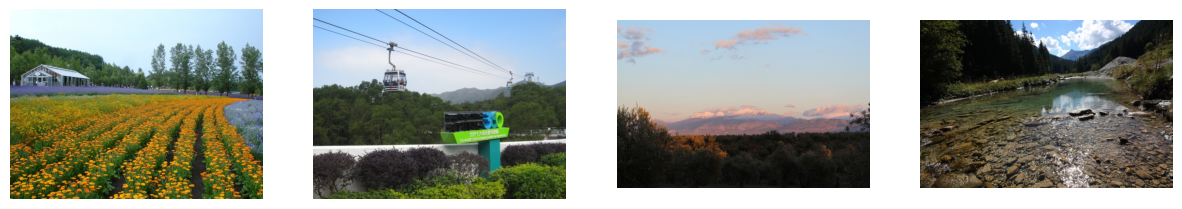

In [13]:
# 4 sample images from random classes
fig=plt.figure(figsize=(15,15))
for i in range(1,5):
    ri=random.choices(os.listdir(base_path),k=3)
    folder=base_path+"/"+ri[0]+"/"+ri[1]+"/"+ri[2]
    random_img=random.choice(os.listdir(folder))
    img=np.array(Image.open(folder+"/"+random_img))
    fig.add_subplot(1,4,i)
    plt.imshow(img)
    plt.axis("off")
plt.show()

In [14]:
#Build The model
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras  import Sequential
tf.compat.v1.disable_eager_execution()

In [15]:
#hyper parameter
l_rate=0.0001
d_speed=1e-6
mm=0.9
loss_fun="sparse_categorical_crossentropy"
source_model=VGG19(weights=None)
drop_layer=Dropout(0.5)

In [17]:
model=Sequential()
for layer in source_model.layers[:-1]:
    if layer== source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
model.add(Dense(num_classes,activation="softmax"))
model.summary()      

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 224, 224, 3)       12        
 Normalization)                                                  
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)

In [19]:
optim1=keras.optimizers.Adam(learning_rate=l_rate)
model.compile(optimizer=optim1,loss=loss_fun,metrics=["accuracy"])

In [22]:
def img_reshape(im,target_size):
    return cv2.resize(im,target_size)

In [50]:
def get_batch(dataf,start,batch_size):
    image_array=[]
    label_array=[]
    end_img=start+batch_size
    if(end_img)>len(dataf):
        end_img=len(dataf)
    for idx in range(start,end_img):
        n=idx
        im,label=get_image_num(n,dataf)
        image_array.append(im)
        label_array.append(label)
    label_array=encodel(label_array)
    return np.array(image_array),np.array(label_array)

In [32]:
#split
train,val=np.split(df.sample(frac=1),[int(0.8*len(df))])
print(len(train))
print(len(val))

12925
3232


In [25]:
train

,id,url,landmark_id
2602653,003cfd2fd8967b0d,https://upload.wikimedia.org/wikipedia/commons...,32108
1986541,0033ad0d45e61c92,http://upload.wikimedia.org/wikipedia/commons/...,58363
2850656,00cbb8b0f15a15ec,https://upload.wikimedia.org/wikipedia/commons...,111311
3950029,0088073f6270da91,https://upload.wikimedia.org/wikipedia/commons...,170957
1918017,0004ee1e36bb3538,https://upload.wikimedia.org/wikipedia/commons...,196433
...,...,...,...
2295941,00996d66a8347514,https://upload.wikimedia.org/wikipedia/commons...,663
3833944,000a9da4f4030ce0,https://upload.wikimedia.org/wikipedia/commons...,138982
2040582,0061fdf319095c51,https://upload.wikimedia.org/wikipedia/commons...,17993
2498665,0067ee0597d26e8e,https://upload.wikimedia.org/wikipedia/commons...,78691


In [26]:
train=train.sample(frac=1)
train

,id,url,landmark_id
2476620,005f7e7444eb80e5,https://upload.wikimedia.org/wikipedia/commons...,15862
1113469,009b3506bfb4543e,https://upload.wikimedia.org/wikipedia/commons...,23626
1314890,008522564598a4ce,https://upload.wikimedia.org/wikipedia/commons...,142288
1284178,000b70098e013a3b,https://upload.wikimedia.org/wikipedia/commons...,29837
4026939,0060436250bafde0,https://upload.wikimedia.org/wikipedia/commons...,106861
...,...,...,...
1108987,0085c8c7078e31c6,https://upload.wikimedia.org/wikipedia/commons...,134125
3417497,00bdf731cbbdc54a,https://upload.wikimedia.org/wikipedia/commons...,21258
4002291,00f9cf8c15a40b28,https://upload.wikimedia.org/wikipedia/commons...,200572
14881,0053321f1fbf1642,https://upload.wikimedia.org/wikipedia/commons...,116378


In [27]:
batch_size=16
epoch_shuffle=True
weight_classes=True
epochs=1

In [28]:
int(np.ceil(len(train)/batch_size))

808

In [51]:
for e in range(epochs):
    print("Epoch:"+ str (e+1)+"/"+str(epochs))
    if epoch_shuffle:
        train=train.sample(frac=1)
    for it in range(int(np.ceil(len(train)/batch_size))):
        x_train,y_train=get_batch(train,it*batch_size,batch_size)
        model.train_on_batch(x_train,y_train)
model.save("model")

Epoch:1/1


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [40]:
#test
batch_size=20
errors=0
good_preds=[]
bad_preds=[]
for it in range(int(np.ceil(len(val)/batch_size))):
    x_val,y_val=get_batch(val,it*batch_size,batch_size)
    result=model.predict(x_val)
    cla=np.argmax(result,axis=1)
    for idx in enumerate(result):
        if cla[idx]!=y_val[idx]:
            errors=errors+1
            bad_preds.append([batch_size*it+idx,cla[idx],res[cla[idx]]])
        else:
             good_preds.append([batch_size*it+idx,cla[idx],res[cla[idx]]])   
    for i in range(1,6):
        n= int(good_preds[0])
        img,lab=get_image_num(n,val)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.imshow(img)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [ ]:
good_preds=np.array(good_preds)
good_preds=np.array(sorted(good_preds,key=lambda x:x[2],reverse=True))

In [ ]:
len(good_preds)